In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **1.**

## **(a.)**

In [2]:
# transfer the data to dataframe
memory = [5, 5, 6, 6, 7, 7, 7, 8, 9, 9, 10, 4, 11, 13, 13, 13, 16, 16, 19, 20]
anxiety = [20, 21, 24, 32, 32, 21, 45, 45, 31, 22, 44, 45, 46, 49, 45, 60, 56, 57, 48, 41]
depression = [0, 0, 0, 1, 1, 1, 3, 3, 5, 8, 6, 6, 7, 8, 10, 16, 20, 13, 28, 24]
self_esteem = [16, 15, 19, 18, 17, 18, 16, 10, 15, 15, 14, 13, 15, 12, 10, 9, 2, 2, 12, 1]

# len(memory), len(anxiety), len(depression), len(self_esteem)
# convert the 4 lists to a dataframe
df = pd.DataFrame({'Memory': memory, 'Anxiety': anxiety, 'Depression': depression, 'Self_Esteem': self_esteem})

# save the dataframe to a csv file
df.to_csv('exam1.csv', index=False)

df

,Memory,Anxiety,Depression,Self_Esteem
0,5,20,0,16
1,5,21,0,15
2,6,24,0,19
3,6,32,1,18
4,7,32,1,17
5,7,21,1,18
6,7,45,3,16
7,8,45,3,10
8,9,31,5,15
9,9,22,8,15


In [3]:
# Perform a series of correlations on the above (fictitious) data.
# Compute the correlation matrix.
corr = df.corr()
corr

,Memory,Anxiety,Depression,Self_Esteem
Memory,1.000000,0.631711,0.925598,-0.786000
Anxiety,0.631711,1.000000,0.624016,-0.678946
Depression,0.925598,0.624016,1.000000,-0.746602
Self_Esteem,-0.786000,-0.678946,-0.746602,1.000000


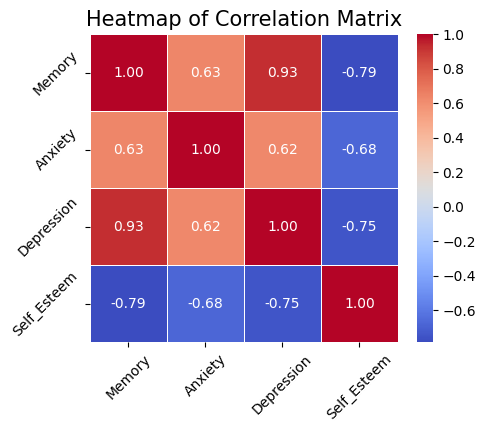

In [4]:
# plot the correlation matrix using seaborn
# Set up the matplotlib figure
plt.figure(figsize=(5, 4))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

# Adding titles and labels for clarity
plt.title('Heatmap of Correlation Matrix', fontsize=15)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()

## **(b.)**

In [5]:
# Demonstrate through multiple regression to examine the contribution of each independent variable to the prediction of Memory Bias.
# import the necessary packages
import statsmodels.api as sm

# Define the dependent variable
Y = df['Memory']

# Define the independent variables
X = df[['Anxiety', 'Depression', 'Self_Esteem']]

# Adding a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Get the summary of the regression
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Memory   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     38.11
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.63e-07
Time:                        04:07:23   Log-Likelihood:                -38.112
No. Observations:                  20   AIC:                             84.22
Df Residuals:                      16   BIC:                             88.21
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.7238      3.027      2.882      0.011       2.307      15.141
Anxiety         0.0061      0.046      0.135      0.894      -0.090       0.103
Depression      0.4383      0.078      5.612      0.000       0.273       0.604
Self_Esteem    -0.1824      0.127     -1.431      0.172      -0.453       0.088
==============================================================================
Omnibus:                       14.465   Durbin-Watson:                   2.292
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.318
Skew:                          -1.405   Prob(JB):                     0.000778
Kurtosis:                       6.048   Cond. No.                         324.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**The amount of variance accounted for by the regression equation is indicated by the R-squared value. In the summary of the regression model, the R-squared value is reported as 0.877. This means that 87.7% of the variance in the dependent variable (Memory) is accounted for by the independent variables in the model.**

## **(c.)**

In [6]:
# Define the dependent and independent variables
Y = df['Memory']
X = df[['Anxiety', 'Depression', 'Self_Esteem']]
X = sm.add_constant(X)  # Adding a constant for the intercept

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Define the values for the prediction
anxiety_score = 44
depression_score = 13
self_esteem_score = 12

# Create a DataFrame for the prediction
predict_df = pd.DataFrame({'const': 1, 'Anxiety': [anxiety_score], 
                           'Depression': [depression_score], 
                           'Self_Esteem': [self_esteem_score]})

# Predict the Memory value
predicted_memory = model.predict(predict_df)
predicted_memory_value = predicted_memory[0]
predicted_memory_value

12.503080579929744

## **(d.)**

In [7]:
# Fit the regression model again
model = sm.OLS(Y, X).fit()

# Get the summary of the regression
model_summary = model.summary()
model_summary.tables[1]  # Displaying only the coefficients table for clarity

,coef,std err,t,P>|t|,[0.025,0.975]
const,8.7238,3.027,2.882,0.011,2.307,15.141
Anxiety,0.0061,0.046,0.135,0.894,-0.090,0.103
Depression,0.4383,0.078,5.612,0.000,0.273,0.604
Self_Esteem,-0.1824,0.127,-1.431,0.172,-0.453,0.088


**A predictor is considered significant if its p-value is below a certain threshold (commonly 0.05).**

**Among significant predictors, the one with the largest absolute coefficient value is often considered the strongest predictor, as it indicates a greater change in the dependent variable for each unit change in the predictor.**

**According to the p-value gained in the coefficcient table, we can see the lowest p-value we gained is 0.000, the highest coefficient we gained is 0.4383, both these metrics are gained from Depression, therefore it is the best predictor of Memory Bias.**

## **(e.)**

In [8]:
# Step 1: Regression with only Anxiety as the predictor
X_step1 = sm.add_constant(df[['Anxiety']])
model_step1 = sm.OLS(Y, X_step1).fit()

# Step 2: Regression with Anxiety, Depression, and Self_Esteem as predictors
model_step2 = sm.OLS(Y, X).fit()

# Summaries of both models
model_summary_step1 = model_step1.summary()
model_summary_step2 = model_step2.summary()

model_summary_step1.tables[1], model_summary_step2.tables[1]

(<class 'statsmodels.iolib.table.SimpleTable'>,
 <class 'statsmodels.iolib.table.SimpleTable'>)

In [9]:
# Extracting the required details from the model summary of Step 1
anxiety_coefficient_step1 = model_step1.params['Anxiety']
anxiety_p_value_step1 = model_step1.pvalues['Anxiety']
anxiety_coefficient_step2 = model_step2.params['Anxiety']
anxiety_p_value_step2 = model_step2.pvalues['Anxiety']
# anxiety_coefficient_step1, anxiety_p_value_step1
print('Anxiety coefficient in Step 1:', anxiety_coefficient_step1)
print('Anxiety p-value in Step 1:', anxiety_p_value_step1)
# anxiety_coefficient_step2, anxiety_p_value_step2
print('Anxiety coefficient in Step 2:', anxiety_coefficient_step2)
print('Anxiety p-value in Step 2:', anxiety_p_value_step2)

Anxiety coefficient in Step 1: 0.23405068126830514
Anxiety p-value in Step 1: 0.0028107899507281106
Anxiety coefficient in Step 2: 0.0061382985305667576
Anxiety p-value in Step 2: 0.8944399276102067


**From the output of the last code cell we can see that, from step 1 to step 2, with the addition of Depression and Self-Esteem, the p-value increased from 0.0028 to 0.89, which makes the p-value out of the critical significance value, also the coefficient dropped from 0.23 to 0.0061. This change suggests that the predictive power of Anxiety on Memory Bias is greatly reduced when accounting for Depression and Self-Esteem.**

# **2.**

In [11]:
data = {
    'Therapy': ['A1'] * 4 + ['A2'] * 4 + ['A1'] * 4 + ['A2'] * 4 + ['A1'] * 4 + ['A2'] * 4,
    'Duration': ['B1'] * 8 + ['B2'] * 8 + ['B3'] * 8,
    'Score': [
        6, 9, 8, 5,  # New Therapy Short-term
        10, 11, 5, 9,  # Old Therapy Short-term
        15, 18, 16, 20,  # New Therapy Medium-term
        9, 12, 13, 9,  # Old Therapy Medium-term
        10, 12, 9, 13,  # New Therapy Long-term
        8, 7, 9, 12  # Old Therapy Long-term
    ]
}

# Creating a DataFrame
df2 = pd.DataFrame(data)

# Saving the DataFrame to a csv file
df2.to_csv('exam2.csv', index=False)

df2

,Therapy,Duration,Score
0,A1,B1,6
1,A1,B1,9
2,A1,B1,8
3,A1,B1,5
4,A2,B1,10
5,A2,B1,11
6,A2,B1,5
7,A2,B1,9
8,A1,B2,15
9,A1,B2,18


## **(a.)**

In [22]:
# Generate a table of means and standard deviations for each of the six groups.
# Calculate the means and standard deviations (SDs) for each column
means = df2.groupby('Therapy').mean()
sds = df2.groupby('Therapy').std()

# Concatenate the means and SDs into a single DataFrame
means_sds = pd.concat([means, sds], axis=1)
means_sds.columns = ['Mean', 'SD']
means_sds

/var/folders/f5/lwqzg3x53hn0tdp5sbrv7bf40000gn/T/ipykernel_33807/2540492446.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = df2.groupby('Therapy').mean()
/var/folders/f5/lwqzg3x53hn0tdp5sbrv7bf40000gn/T/ipykernel_33807/2540492446.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sds = df2.groupby('Therapy').std()


,Mean,SD
Therapy,,
A1,11.75,4.750598
A2,9.50,2.276361


## **(b.)**

In [23]:
# Perform an ANOVA using General Linear Model, Univariate, and report the significant effects
# import the necessary packages
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform ANOVA using General Linear Model (GLM)
anova_model = ols('Score ~ C(Therapy) * C(Duration)', data=df2).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(anova_model, typ=2)

# Print the ANOVA table
print(anova_table)

                         sum_sq    df          F    PR(>F)
C(Therapy)               30.375   1.0   6.647416  0.018945
C(Duration)             154.750   2.0  16.933131  0.000073
C(Therapy):C(Duration)   68.250   2.0   7.468085  0.004349
Residual                 82.250  18.0        NaN       NaN


## **(c.)**

### **i**

/var/folders/f5/lwqzg3x53hn0tdp5sbrv7bf40000gn/T/ipykernel_33807/4050436133.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Duration', y='Score', hue='Therapy', data=df2, ci=None)


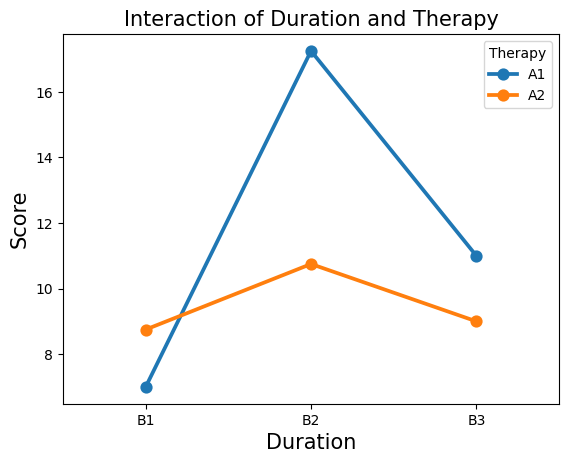

In [24]:
# Plot the interaction of Duration and Therapy
sns.pointplot(x='Duration', y='Score', hue='Therapy', data=df2, ci=None)

# Adding title and labels
plt.title('Interaction of Duration and Therapy', fontsize=15)
plt.xlabel('Duration', fontsize=15)
plt.ylabel('Score', fontsize=15)

# Show the plot
plt.show()

### **ii**

/var/folders/f5/lwqzg3x53hn0tdp5sbrv7bf40000gn/T/ipykernel_33807/726124769.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Therapy', y='Score', hue='Duration', data=df2, ci=None)


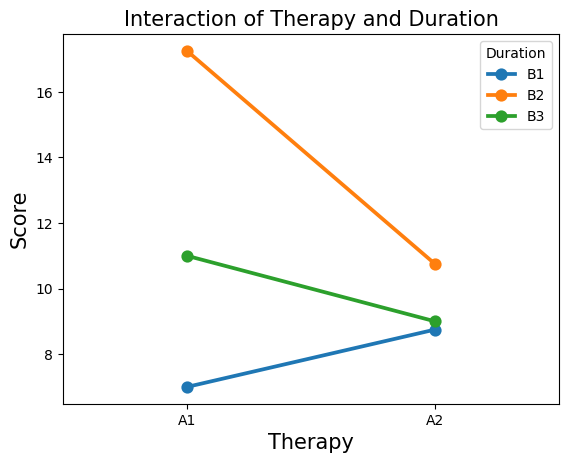

In [25]:
# Plot the interation of Therapy and Duration
sns.pointplot(x='Therapy', y='Score', hue='Duration', data=df2, ci=None)

# Adding title and labels
plt.title('Interaction of Therapy and Duration', fontsize=15)
plt.xlabel('Therapy', fontsize=15)
plt.ylabel('Score', fontsize=15)

# Show the plot
plt.show()

## **(d.)**

In [35]:
# Simple effects analysis requires fitting separate one-way ANOVAs for the subsets of data
# i. Duration at New Therapy (Duration at A1)
subset_new_therapy = df2[df2['Therapy'] == 'A1']

# ii. Therapy at Mid-term (Therapy at B2)
subset_mid_term = df2[df2['Duration'] == 'B2']

# iii. Therapy at Long-term (Therapy at B3)
subset_long_term = df2[df2['Duration'] == 'B3']

# Define the ANOVA models for each subset
anova_new_therapy = ols('Score ~ C(Duration)', data=subset_new_therapy).fit()
anova_mid_term = ols('Score ~ C(Therapy)', data=subset_mid_term).fit()
anova_long_term = ols('Score ~ C(Therapy)', data=subset_long_term).fit()

# Perform ANOVA for each subset
anova_table_new_therapy = sm.stats.anova_lm(anova_new_therapy, typ=2)
anova_table_mid_term = sm.stats.anova_lm(anova_mid_term, typ=2)
anova_table_long_term = sm.stats.anova_lm(anova_long_term, typ=2)

# anova_table_new_therapy, anova_table_mid_term, anova_table_long_term
print("i:\n", anova_table_new_therapy, "\n")
print("ii:\n", anova_table_mid_term, "\n")
print("iii:\n", anova_table_long_term)

i:
              sum_sq   df          F    PR(>F)
C(Duration)  213.50  2.0  27.647482  0.000144
Residual      34.75  9.0        NaN       NaN 

ii:
             sum_sq   df          F    PR(>F)
C(Therapy)    84.5  1.0  18.436364  0.005128
Residual      27.5  6.0        NaN       NaN 

iii:
             sum_sq   df    F    PR(>F)
C(Therapy)     8.0  1.0  2.0  0.207031
Residual      24.0  6.0  NaN       NaN


### **i**

**B at A1**

**The F-statistic is 27.647482 with a p-value of 0.000144. Since the p-value is less than 0.05, this effect is statistically significant. This suggests that there are significant differences in scores across the levels of Duration when the Therapy is new.**

### **ii**

**A at B2**

**The F-statistic is 18.436364 with a p-value of 0.005128. Since the p-value is less than 0.05, this effect is statistically significant. This indicates that there are significant differences in scores between the different Therapies at the mid-term Duration.**

### **iii**

**A at B3**

**The F-statistic is 2.0 with a p-value of 0.207031. The p-value is greater than 0.05, which suggests that this effect is not statistically significant. Therefore, there is no evidence to suggest significant differences in scores between the different Therapies at the long-term Duration.**

## **(e.)**

**Both the Duration effect within new Therapy and the Therapy effect at mid-term Duration are significant, indicating differences in scores across these levels. However, the Therapy effect at long-term Duration does not show a significant difference in scores.**

# **3.**

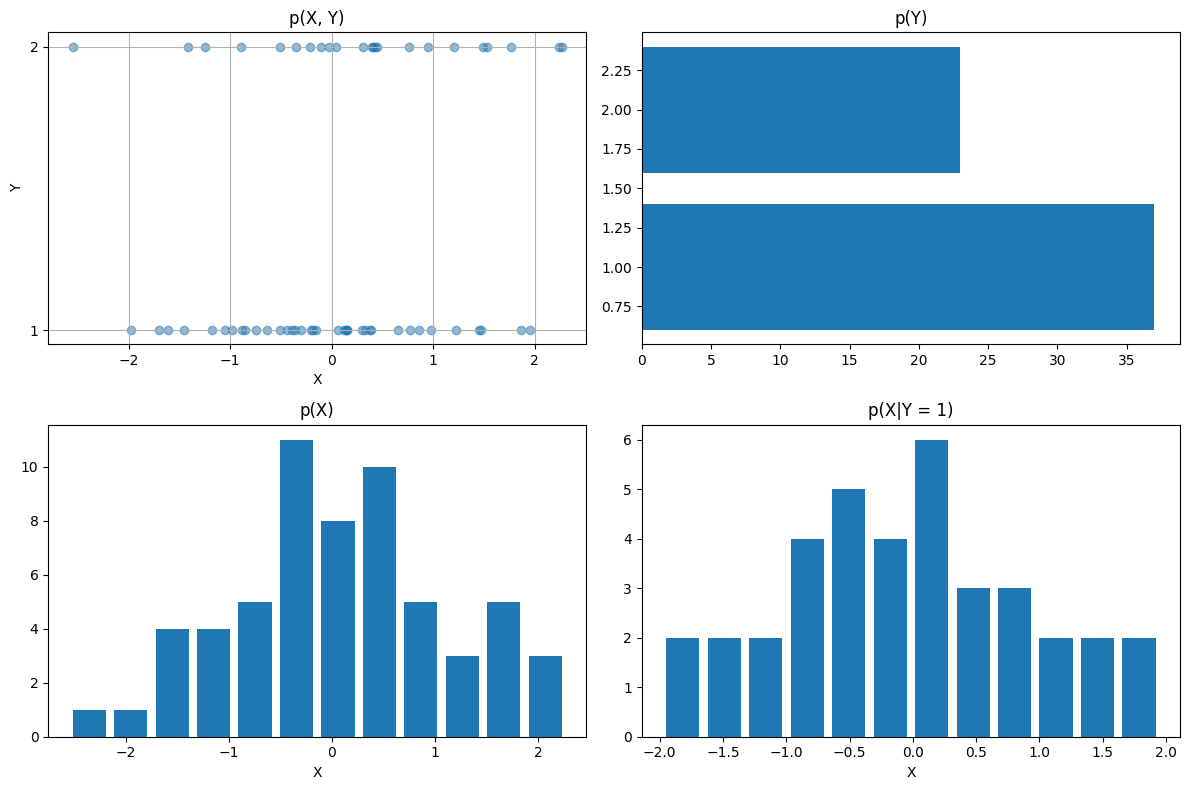

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic dataset
N = 60
np.random.seed(0)  # For reproducibility
X = np.random.randn(N)
Y = np.random.choice([1, 2], N)

# Create a scatter plot for the joint distribution of X and Y with gridlines
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(X, Y, alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.yticks([1, 2])
plt.title('p(X, Y)')
plt.grid(True)

# Histogram of Y
plt.subplot(2, 2, 2)
plt.hist(Y, bins=np.arange(0.5, 3), rwidth=0.8, orientation='horizontal')
plt.title('p(Y)')

# Histogram of X
plt.subplot(2, 2, 3)
plt.hist(X, bins=12, rwidth=0.8)
plt.title('p(X)')
plt.xlabel('X')

# Conditional histogram of X given Y == 1
plt.subplot(2, 2, 4)
plt.hist(X[Y == 1], bins=12, rwidth=0.8)
plt.title('p(X|Y = 1)')
plt.xlabel('X')

plt.tight_layout()
plt.show()

# **4.**

Accuracy of Logistic Regression: 0.14
Accuracy of Linear SVC: 0.115


/Users/huangyunjie/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy of SVC: 0.215
Accuracy of KNeighbors Classifier: 0.12
Accuracy of Bayesian Logistic Regression: 0.2


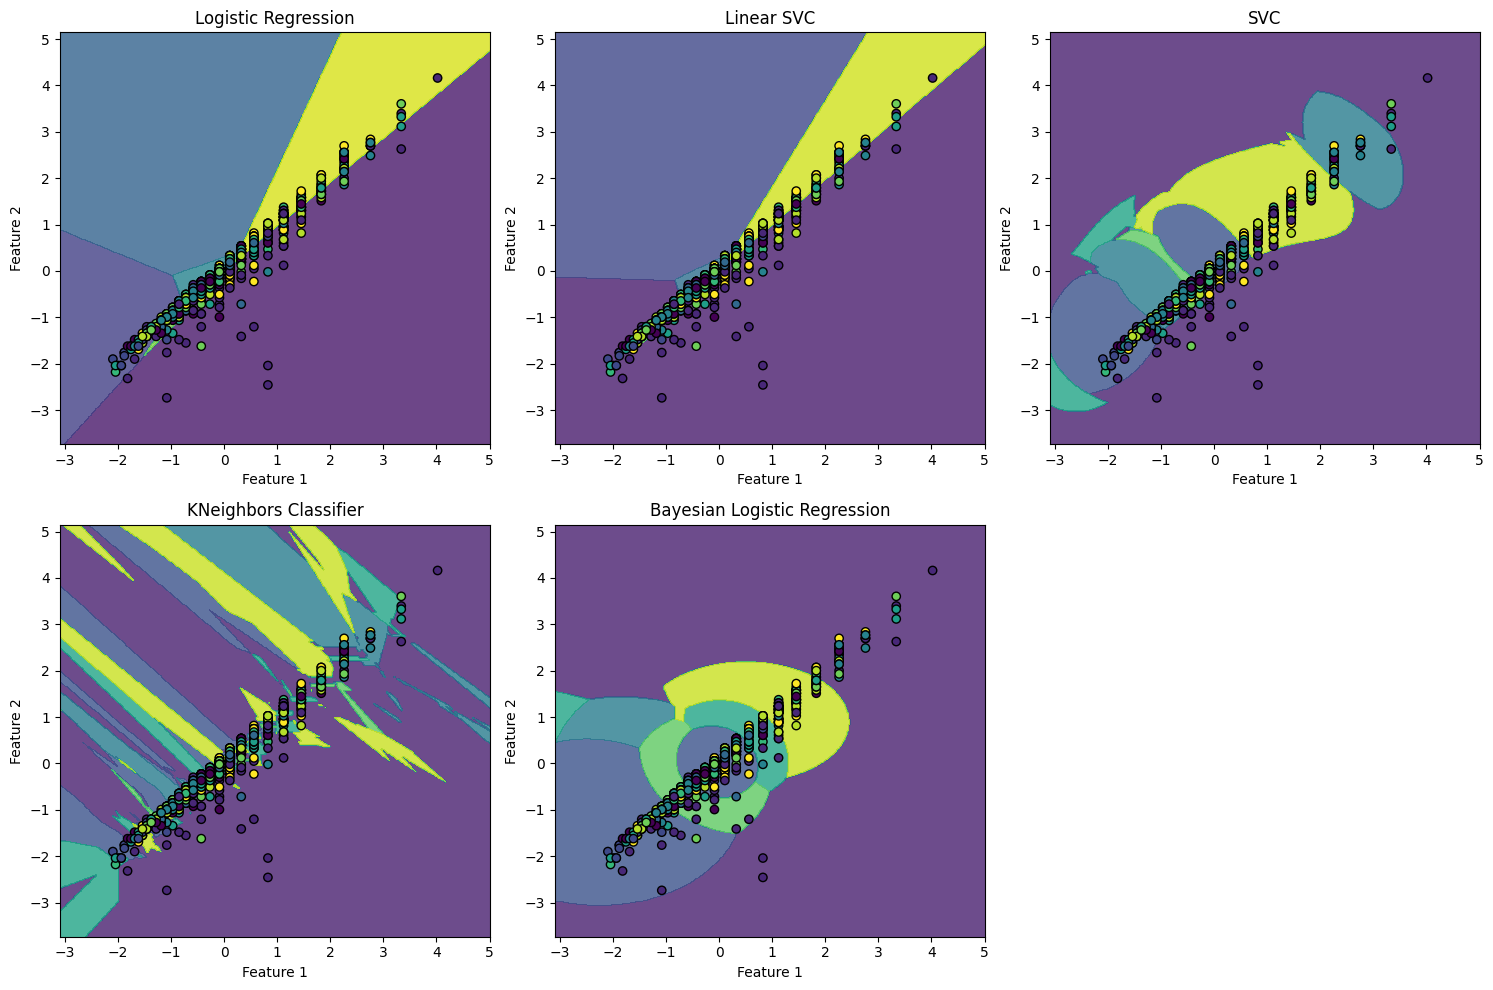

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
data = pd.read_csv('data.csv')  # Replace with your file path

# Preprocessing
data = data.drop(columns=['filename'])  # Drop non-feature column
data['label'] = LabelEncoder().fit_transform(data['label'])  # Encode target variable
X = data.drop(columns=['label'])
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, ax, title):
    h = .02  # Mesh step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# Reducing to two features for visualization
X_train_reduced = X_train[:, :2]
X_test_reduced = X_test[:, :2]

# Creating and fitting classifiers
classifiers = [LogisticRegression(), LinearSVC(), SVC(), KNeighborsClassifier(), GaussianNB()]
classifier_names = ["Logistic Regression", "Linear SVC", "SVC", "KNeighbors Classifier", "Bayesian Logistic Regression"]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for clf, name, ax in zip(classifiers, classifier_names, axes.flatten()[:5]):
    clf.fit(X_train_reduced, y_train)
    plot_decision_boundaries(X_train_reduced, y_train, clf, ax, name)
    y_pred = clf.predict(X_test_reduced)
    print(f"Accuracy of {name}: {accuracy_score(y_test, y_pred)}")

axes.flatten()[5].axis('off')
plt.tight_layout()
plt.show()

**Comment**

**Logistic Regression shows a linear decision boundary. Its performance is modest, suggesting that the dataset may not be linearly separable or that more features are needed for better classification.**

**Linear SVC also creates a linear boundary, similar to Logistic Regression. Its slightly lower accuracy may indicate sensitivity to the default hyperparameters or the feature scaling.**

**SVC (with RBF kernel) shows a more complex, non-linear boundary. Its higher accuracy compared to linear models suggests that the data might have a non-linear distribution. However, the accuracy is still not high, indicating potential challenges with the dataset's complexity or the need for hyperparameter tuning.**

**KNeighbors Classifier provides a boundary that captures more nuances in the data distribution. Its performance is comparable to Logistic Regression, indicating a balance between capturing data complexity and overfitting.**

**Bayesian Logistic Regression (Gaussian Naive Bayes) shows a decision boundary that is somewhat linear but more flexible than strict linear classifiers. Its performance is relatively better, indicating some success in capturing the underlying data distribution.**

**The accuracy scores suggest a bit poor performance of these classifiers. This could be due to the dataset is either complex or not easily separable with linear models, also as hyperparameters were set as default, hyperparameter tuning could probably increase the performance.**

Accuracy of Logistic Regression: 0.5779816513761468
Accuracy of Linear SVC: 0.5688073394495413


/Users/huangyunjie/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy of SVC: 0.5688073394495413
Accuracy of KNeighbors Classifier: 0.47706422018348627
Accuracy of Bayesian Logistic Regression: 0.5596330275229358


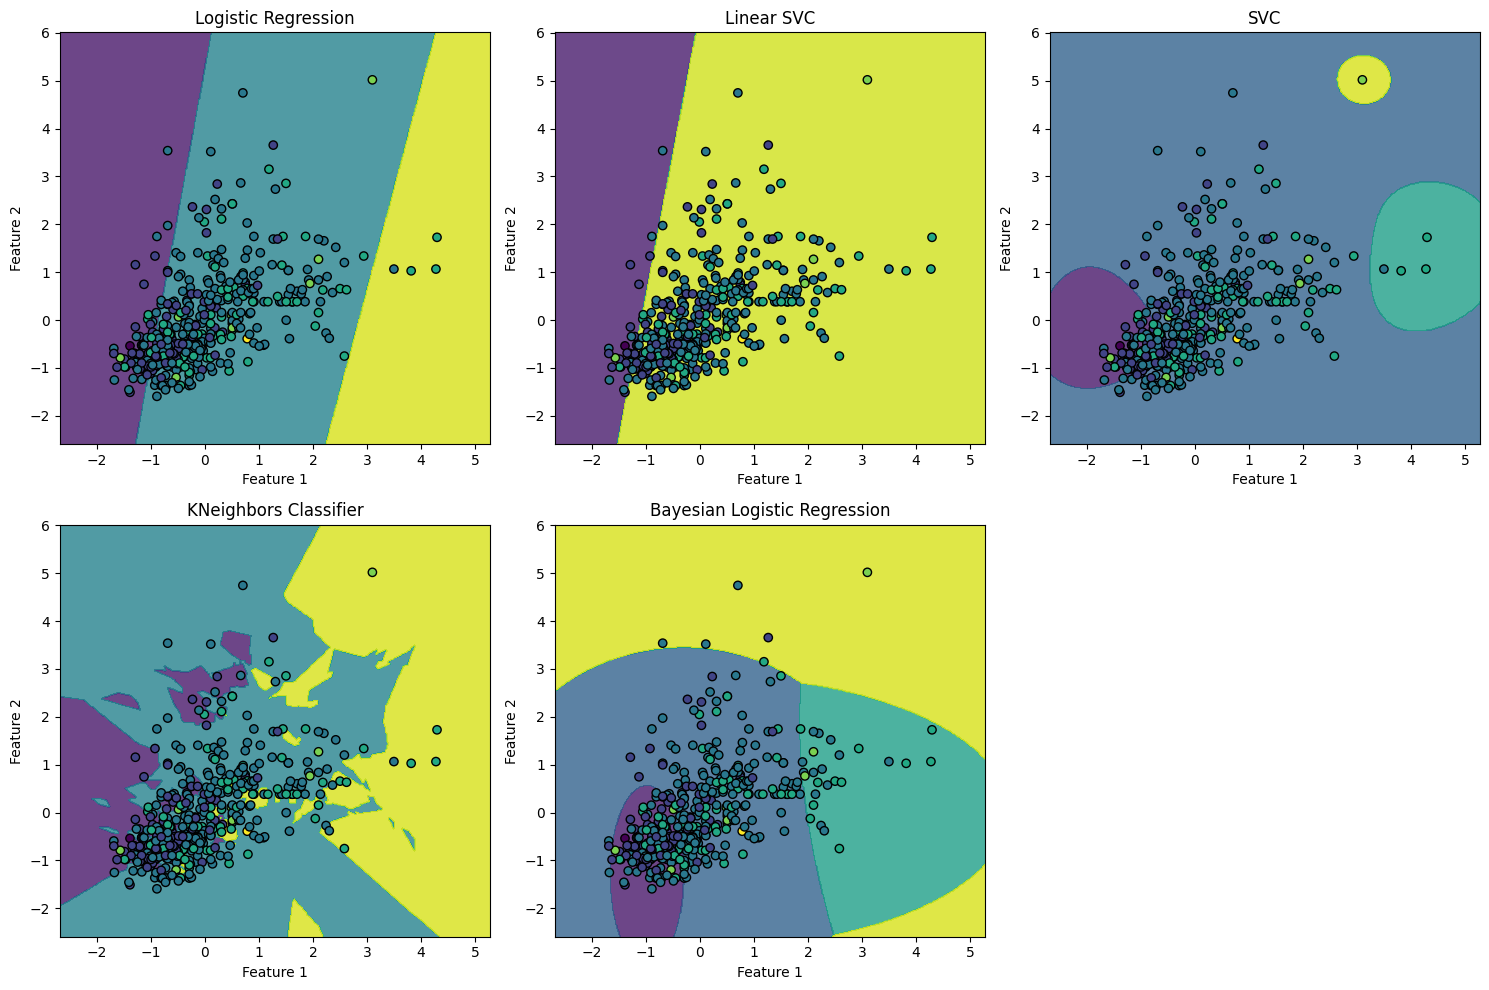

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the dataset
housing_data = pd.read_csv('Housing.csv')  # Replace with your file path

# Preprocessing
categorical_cols = housing_data.select_dtypes(include=['object']).columns
housing_data_encoded = pd.get_dummies(housing_data, columns=categorical_cols, drop_first=True)
X = housing_data_encoded.drop(columns=['bedrooms'])
y = housing_data_encoded['bedrooms']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, ax, title):
    h = .02  # Mesh step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# Selecting only two features for visualization
X_train_reduced = X_train[:, :2]
X_test_reduced = X_test[:, :2]

# Creating classifiers
classifiers = [LogisticRegression(), LinearSVC(), SVC(), KNeighborsClassifier(), GaussianNB()]
classifier_names = ["Logistic Regression", "Linear SVC", "SVC", "KNeighbors Classifier", "Bayesian Logistic Regression"]

# Plotting decision boundaries and calculating accuracy
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for clf, name, ax in zip(classifiers, classifier_names, axes.flatten()[:5]):
    clf.fit(X_train_reduced, y_train)
    plot_decision_boundaries(X_train_reduced, y_train, clf, ax, name)
    y_pred = clf.predict(X_test_reduced)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy}")

axes.flatten()[5].axis('off')  # Hide the unused subplot
plt.tight_layout()
plt.show()

**Comment**

**Logistic Regression shows a linear decision boundary. Its relatively higher accuracy suggests it is somewhat effective in classifying the number of bedrooms based on the chosen features, but the performance is not exceptional.**

**Linear SVC also produces a linear boundary, similar to Logistic Regression, with slightly lower accuracy. This indicates a similar performance capability in this classification task.**

**SVC (with RBF kernel), much like Linear SVC, has a similar accuracy, indicating that for the selected features, the addition of a non-linear kernel does not significantly change the performance.**

**KNeighbors Classifier shows a more fragmented decision boundary. Its lower accuracy might be due to overfitting to the training data or not capturing the underlying patterns well with the selected features.**

**Bayesian Logistic Regression (Gaussian Naive Bayes) shows a performance comparable to logistic regression and SVC, suggesting it's somewhat effective but not superior in this context.**